# ЛР3 — Бинарная сегментация избражений
---
*Зубарева Марина, РИМ-281226*

In [1]:
import numpy as np
import os
from PIL import Image
import torch
import torchvision
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13,8)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/train"

images	masks


In [4]:
path = '/content/drive/My Drive/train'
os.listdir(path)

['masks', 'images']

In [5]:
for folder in os.listdir(path):
    pathes = []
    for pth, dirs, files in os.walk(os.path.join(path, folder)):
        for file in files:
            pathes.append(os.path.join(pth, file))
    if folder == 'images':
        img_pathes = pathes
    elif folder == 'masks':
        lbl_pathes = pathes
        
img_pathes.sort()
lbl_pathes.sort()

In [6]:
import torch
from torch.utils import data

T = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.ToTensor(),
])

class Dataset(data.Dataset):
    def __init__(self, path, subset = 'train', transform = None):

        for folder in os.listdir(path):
            pathes = []
            for pth, dirs, files in os.walk(os.path.join(path, folder)):
                for file in files:
                    pathes.append(os.path.join(pth, file))
            if folder == 'images':
                img_pathes = pathes
            elif folder == 'masks':
                lbl_pathes = pathes
   
        img_pathes.sort()
        lbl_pathes.sort()
        
        items = list(zip(img_pathes, lbl_pathes))
        
        if subset == 'train':
            self.items = items[: int(.7 * len(items))]
        elif subset == 'valid':
            self.items = items[int(.7 * len(items)): int(.9 * len(items))]
        elif subset == 'test':
            self.items = items[int(.9 * len(items)):]
            
        self.transform = transform

    def __len__(self):
        return len(self.items)

    def __getitem__(self, index):
        img_name, msk_name = self.items[index]

        image = Image.open(img_name)
        mask = Image.open(msk_name).convert('L')

        
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
        
        return image, mask

In [7]:
data = Dataset(path, subset='train', transform=None)

In [8]:
img, msk = data[40]

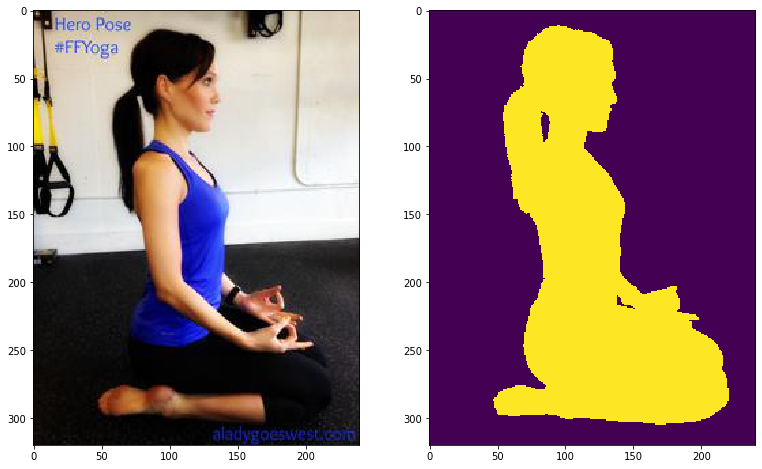

In [9]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(img)
axs[1].imshow(msk)

In [10]:
train_data = Dataset(path, subset='train', transform=T)
valid_data = Dataset(path, subset='valid', transform=T)
test_data = Dataset(path, subset='test', transform=T)

In [11]:

train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=16, 
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=16, 
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, 
                                           batch_size=1, 
                                           shuffle=False)

In [12]:
model_labels = ['resnet18', 'resnet34', 'resnet50', 'dpn68', 'dpn98', 'vgg13']

In [13]:
pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-t2je7mgc
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-t2je7mgc
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.0-cp36-none-any.whl size=33585 sha256=04866bee12d38eb896a3d3258b14eaae967d0bba962b53d50a8e92a64d7a15be
  Stored in directory: /tmp/pip-ephem-wheel-cache-9v14de3k/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [16]:
#import segmentation_models_pytorch as smp
from torch import nn

Encoder: resnet18
Функция ошибки бинарная кроссэнтропия

Epoch: 1
valid: 100%|██████████| 19/19 [00:02<00:00,  7.15it/s, bce_loss - 0.232, iou_score - 0.8544, fscore - 0.9213]

Epoch: 2
valid: 100%|██████████| 19/19 [00:02<00:00,  7.11it/s, bce_loss - 0.1859, iou_score - 0.9182, fscore - 0.9573]

Epoch: 3
valid: 100%|██████████| 19/19 [00:02<00:00,  7.03it/s, bce_loss - 0.1682, iou_score - 0.9293, fscore - 0.9633]

Epoch: 4
valid: 100%|██████████| 19/19 [00:02<00:00,  7.11it/s, bce_loss - 0.166, iou_score - 0.937, fscore - 0.9674]

Epoch: 5
valid: 100%|██████████| 19/19 [00:02<00:00,  7.00it/s, bce_loss - 0.1468, iou_score - 0.9406, fscore - 0.9694]

Epoch: 6
valid: 100%|██████████| 19/19 [00:02<00:00,  7.19it/s, bce_loss - 0.1365, iou_score - 0.9401, fscore - 0.9691]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:02<00:00,  7.11it/s, bce_loss - 0.1356, iou_score - 0.94, fscore - 0.969]

Epoch: 8
valid: 100%|██████████| 19/19 [00:02<00:00,  7.14it/s

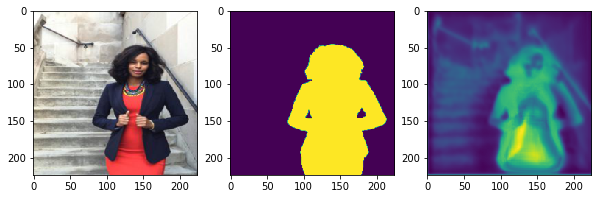

Encoder: resnet34
Функция ошибки бинарная кроссэнтропия

Epoch: 1
valid: 100%|██████████| 19/19 [00:02<00:00,  7.19it/s, bce_loss - 0.1781, iou_score - 0.9171, fscore - 0.9566]

Epoch: 2
valid: 100%|██████████| 19/19 [00:02<00:00,  6.82it/s, bce_loss - 0.1455, iou_score - 0.9361, fscore - 0.9669]

Epoch: 3
valid: 100%|██████████| 19/19 [00:02<00:00,  6.93it/s, bce_loss - 0.113, iou_score - 0.9465, fscore - 0.9725]

Epoch: 4
valid: 100%|██████████| 19/19 [00:02<00:00,  7.01it/s, bce_loss - 0.1095, iou_score - 0.943, fscore - 0.9707]

Epoch: 5
valid: 100%|██████████| 19/19 [00:02<00:00,  6.85it/s, bce_loss - 0.1048, iou_score - 0.9486, fscore - 0.9736]

Epoch: 6
valid: 100%|██████████| 19/19 [00:02<00:00,  6.67it/s, bce_loss - 0.09808, iou_score - 0.9454, fscore - 0.9719]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:02<00:00,  6.83it/s, bce_loss - 0.09476, iou_score - 0.9522, fscore - 0.9755]

Epoch: 8
valid: 100%|██████████| 19/19 [00:02<00:00,  7.

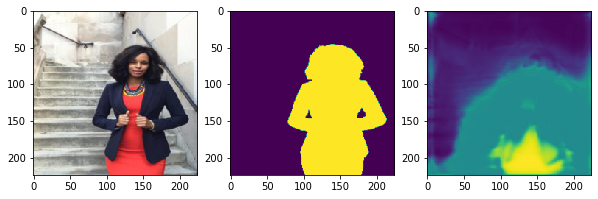

Encoder: resnet50
Функция ошибки бинарная кроссэнтропия

Epoch: 1
valid: 100%|██████████| 19/19 [00:03<00:00,  6.96it/s, bce_loss - 0.1769, iou_score - 0.9136, fscore - 0.9548]

Epoch: 2
valid: 100%|██████████| 19/19 [00:03<00:00,  6.73it/s, bce_loss - 0.1383, iou_score - 0.9372, fscore - 0.9675]

Epoch: 3
valid: 100%|██████████| 19/19 [00:03<00:00,  6.26it/s, bce_loss - 0.1329, iou_score - 0.9425, fscore - 0.9704]

Epoch: 4
valid: 100%|██████████| 19/19 [00:03<00:00,  6.85it/s, bce_loss - 0.119, iou_score - 0.9406, fscore - 0.9694]

Epoch: 5
valid: 100%|██████████| 19/19 [00:03<00:00,  6.63it/s, bce_loss - 0.1099, iou_score - 0.9496, fscore - 0.9741]

Epoch: 6
valid: 100%|██████████| 19/19 [00:03<00:00,  6.70it/s, bce_loss - 0.1027, iou_score - 0.9505, fscore - 0.9746]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:03<00:00,  6.66it/s, bce_loss - 0.1036, iou_score - 0.9512, fscore - 0.975]

Epoch: 8
valid: 100%|██████████| 19/19 [00:03<00:00,  7.19

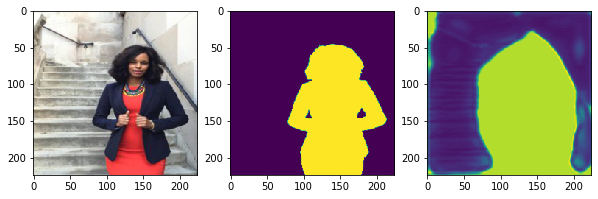

Encoder: dpn68
Функция ошибки бинарная кроссэнтропия

Epoch: 1
valid: 100%|██████████| 19/19 [00:03<00:00,  6.04it/s, bce_loss - 0.2412, iou_score - 0.8491, fscore - 0.9183]

Epoch: 2
valid: 100%|██████████| 19/19 [00:03<00:00,  5.79it/s, bce_loss - 0.2107, iou_score - 0.8736, fscore - 0.9324]

Epoch: 3
valid: 100%|██████████| 19/19 [00:03<00:00,  5.89it/s, bce_loss - 0.1707, iou_score - 0.932, fscore - 0.9648]

Epoch: 4
valid: 100%|██████████| 19/19 [00:03<00:00,  5.58it/s, bce_loss - 0.1475, iou_score - 0.9361, fscore - 0.967]

Epoch: 5
valid: 100%|██████████| 19/19 [00:03<00:00,  6.11it/s, bce_loss - 0.1403, iou_score - 0.9233, fscore - 0.96]

Epoch: 6
valid: 100%|██████████| 19/19 [00:03<00:00,  5.97it/s, bce_loss - 0.1261, iou_score - 0.9377, fscore - 0.9678]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:03<00:00,  5.91it/s, bce_loss - 0.1237, iou_score - 0.9448, fscore - 0.9716]

Epoch: 8
valid: 100%|██████████| 19/19 [00:03<00:00,  5.97it/s,

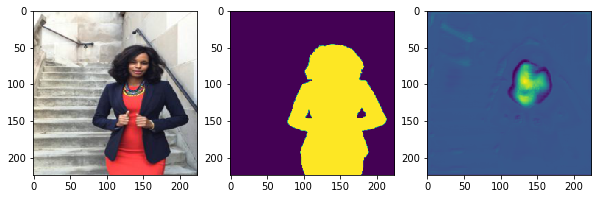

Encoder: dpn98
Функция ошибки бинарная кроссэнтропия

Epoch: 1
valid: 100%|██████████| 19/19 [00:05<00:00,  3.86it/s, bce_loss - 0.1949, iou_score - 0.8929, fscore - 0.9433]

Epoch: 2
valid: 100%|██████████| 19/19 [00:05<00:00,  4.07it/s, bce_loss - 0.1543, iou_score - 0.8967, fscore - 0.9454]

Epoch: 3
valid: 100%|██████████| 19/19 [00:05<00:00,  3.98it/s, bce_loss - 0.1264, iou_score - 0.9405, fscore - 0.9693]

Epoch: 4
valid: 100%|██████████| 19/19 [00:05<00:00,  4.03it/s, bce_loss - 0.1074, iou_score - 0.945, fscore - 0.9717]

Epoch: 5
valid: 100%|██████████| 19/19 [00:05<00:00,  4.11it/s, bce_loss - 0.09702, iou_score - 0.9508, fscore - 0.9747]

Epoch: 6
valid: 100%|██████████| 19/19 [00:05<00:00,  4.03it/s, bce_loss - 0.09026, iou_score - 0.952, fscore - 0.9754]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:05<00:00,  4.04it/s, bce_loss - 0.0882, iou_score - 0.956, fscore - 0.9775]

Epoch: 8
valid: 100%|██████████| 19/19 [00:04<00:00,  4.19it

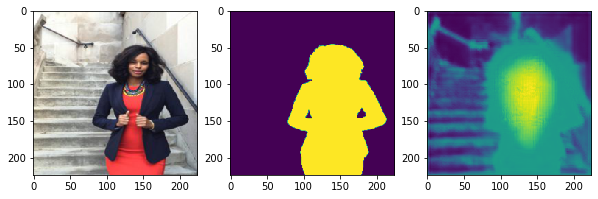

Encoder: vgg13
Функция ошибки бинарная кроссэнтропия

Epoch: 1
valid: 100%|██████████| 19/19 [00:03<00:00,  6.38it/s, bce_loss - 0.1461, iou_score - 0.9269, fscore - 0.962]

Epoch: 2
valid: 100%|██████████| 19/19 [00:03<00:00,  6.46it/s, bce_loss - 0.1314, iou_score - 0.9349, fscore - 0.9663]

Epoch: 3
valid: 100%|██████████| 19/19 [00:03<00:00,  6.44it/s, bce_loss - 0.1215, iou_score - 0.9392, fscore - 0.9686]

Epoch: 4
valid: 100%|██████████| 19/19 [00:03<00:00,  6.27it/s, bce_loss - 0.118, iou_score - 0.9399, fscore - 0.969]

Epoch: 5
valid: 100%|██████████| 19/19 [00:03<00:00,  6.68it/s, bce_loss - 0.1169, iou_score - 0.9427, fscore - 0.9705]

Epoch: 6
valid: 100%|██████████| 19/19 [00:03<00:00,  6.37it/s, bce_loss - 0.1091, iou_score - 0.9428, fscore - 0.9705]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:03<00:00,  6.21it/s, bce_loss - 0.1052, iou_score - 0.943, fscore - 0.9706]

Epoch: 8
valid: 100%|██████████| 19/19 [00:03<00:00,  6.38it/s,

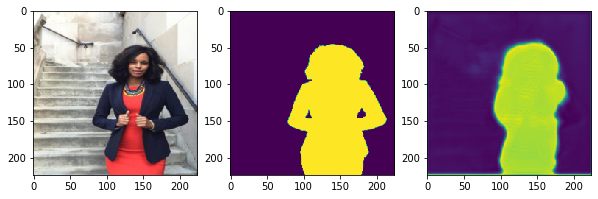

In [17]:
for model_name in model_labels:
    
    print("Encoder: " + str(model_name))
    
    print("Функция ошибки бинарная кроссэнтропия")
            
    model = smp.Unet(model_name).to(device)
            
    loss = nn.BCEWithLogitsLoss()
    loss.__name__ = 'bce_loss'
    metrics = [
        smp.utils.metrics.IoU(eps=1.),
        smp.utils.metrics.Fscore(eps=1.),
    ]

    optimizer = torch.optim.Adam([
        {'params': model.decoder.parameters(), 'lr': 1e-3},     

        {'params': model.encoder.parameters(), 'lr': 1e-5},  
    ])
            
    train_epoch = smp.utils.train.TrainEpoch(
        model, 
        loss=loss, 
        metrics=metrics, 
        optimizer=optimizer,
        device=device,
        verbose=True,
    )

    valid_epoch = smp.utils.train.ValidEpoch(
        model, 
        loss=loss, 
        metrics=metrics, 
        device=device,
        verbose=True,
    )
            
    max_score = 0

    #эпохи  
    for i in range(0, 20):

        print('\nEpoch: {}'.format(i + 1))
        train_logs = train_epoch.run(train_loader)
        valid_logs = valid_epoch.run(valid_loader)

        # do something (save model, change lr, etc.)
    #     if max_score < valid_logs['iou']:
    #         max_score = valid_logs['iou']
    #         torch.save(model, './best_model.pth')
    #         print('Model saved!')

        if i == 5:
            optimizer.param_groups[0]['lr'] = 1e-5
            print('Decrease decoder learning rate to 1e-5!')
            
    valid_epoch.run(test_loader)
            
            
    print("Функция ошибки Dice")
            
    model = smp.Unet().to(device)

    loss = smp.utils.losses.DiceLoss(eps=1.)

    metrics = [
        smp.utils.metrics.IoU(eps=1.),
        smp.utils.metrics.Fscore(eps=1.),
    ]

    optimizer = torch.optim.Adam([
        {'params': model.decoder.parameters(), 'lr': 1e-3},     

        {'params': model.encoder.parameters(), 'lr': 1e-5},  
    ])

    train_epoch = smp.utils.train.TrainEpoch(
        model, 
        loss=loss, 
        metrics=metrics, 
        optimizer=optimizer,
        device=device,
        verbose=True,
    )

    valid_epoch = smp.utils.train.ValidEpoch(
        model, 
        loss=loss, 
        metrics=metrics, 
        device=device,
        verbose=True,
    )
            
    max_score = 0
    #эпохи 
    for i in range(0, 20):

        print('\nEpoch: {}'.format(i+1))
        train_logs = train_epoch.run(train_loader)
        valid_logs = valid_epoch.run(valid_loader)

        # do something (save model, change lr, etc.)
    #     if max_score < valid_logs['iou']:
    #         max_score = valid_logs['iou']
    #         torch.save(model, './best_model.pth')
    #         print('Model saved!')

        if i == 5:
            optimizer.param_groups[0]['lr'] = 1e-5
            print('Decrease decoder learning rate to 1e-5!')
            
    valid_epoch.run(test_loader)
            
            
    print('Визуализация данных')
            
    img, mask_true = test_data[3]
    mask_pred = torch.sigmoid(model(img.unsqueeze(0).to(device)))
            
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.imshow(img.numpy().transpose(1,2,0))
    plt.subplot(132)
    plt.imshow(mask_true.squeeze().numpy())
    plt.subplot(133)
    plt.imshow(mask_pred.squeeze().cpu().detach().numpy())
    plt.show()